# HK Jockey Club Races Analysis

Horse racing is a popular and legal gambling activity in HK. It would be interesting to see if one can get any value out of its data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline

race = pd.read_csv('races.csv')
race.head(2)

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN


In [2]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6349 entries, 0 to 6348
Data columns (total 37 columns):
race_id               6349 non-null int64
date                  6349 non-null object
venue                 6349 non-null object
race_no               6349 non-null int64
config                6349 non-null object
surface               6349 non-null int64
distance              6349 non-null int64
going                 6349 non-null object
horse_ratings         6349 non-null object
prize                 5887 non-null float64
race_class            6349 non-null int64
sec_time1             6349 non-null float64
sec_time2             6349 non-null float64
sec_time3             6349 non-null float64
sec_time4             3634 non-null float64
sec_time5             821 non-null float64
sec_time6             115 non-null float64
sec_time7             0 non-null float64
time1                 6349 non-null float64
time2                 6349 non-null float64
time3                 6349 non-nu

In [3]:
race['config'].value_counts()

A      2209
C      1174
C+3     984
B       819
B+2     600
A+3     563
Name: config, dtype: int64

In [4]:
race['surface'].value_counts()

0    5656
1     693
Name: surface, dtype: int64

In [5]:
race['distance'].value_counts()

1200    2017
1650    1095
1400    1081
1000     698
1600     637
1800     589
2000     117
2200      90
2400      25
Name: distance, dtype: int64

In [6]:
race['going'].value_counts()

GOOD                4123
GOOD TO FIRM        1613
GOOD TO YIELDING     333
YIELDING              86
FAST                  70
WET SLOW              61
WET FAST              20
SLOW                  15
YIELDING TO SOFT      14
SOFT                  14
Name: going, dtype: int64

In [7]:
race['horse_ratings'].value_counts()

60-40      2196
80-60      1786
40-15       409
100-80      407
G           312
40-0        271
85-60       193
40-10       189
105-80      154
65-40        62
95-75        56
110-85       46
115-90       38
60-35        37
90+          31
95+          24
40-20        23
110-90       21
90-70        21
80-55        13
115-95       11
100-75       10
100+         10
120-95        9
80+           5
75-55         4
120-100       4
85+           3
105-85        2
110-80        1
95-70         1
Name: horse_ratings, dtype: int64

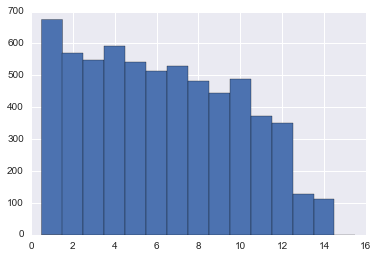

In [24]:
race['place_combination1'].hist(bins = np.linspace(0.5,15.5,16))
plt.show()

In [35]:
race.ix[race['win_combination1'] != race['place_combination1'],['place_combination1','place_combination2','place_combination3']]

,place_combination1,place_combination2,place_combination3
50,6,8,3.0
1953,7,11,12.0
3664,3,5,9.0
3666,4,1,2.0
4410,7,3,4.0
4898,4,9,1.0


In [30]:
race[race['win_combination1'] != race['place_combination1']]['win_combination1']

50       3
1953    12
3664     9
3666     2
4410     4
4898     1
Name: win_combination1, dtype: int64

In [31]:
race[race['win_combination1'] != race['place_combination1']]['place_combination2']

50       8
1953    11
3664     5
3666     1
4410     3
4898     9
Name: place_combination2, dtype: int64

50     NaN
1953   NaN
3664   NaN
3666   NaN
4410   NaN
4898   NaN
Name: win_combination2, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117e01690>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1176ad1d0>]], dtype=object)

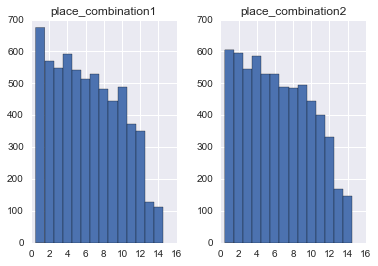

In [39]:
race[['place_combination1','place_combination2']].hist(bins=np.linspace(0.5,14.5,15))

In [46]:
place_lst = pd.concat([race['place_combination1'], race['place_combination2'], race['place_combination3']])

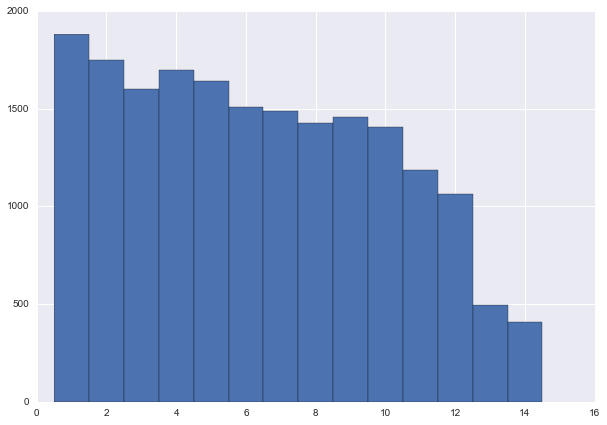

In [59]:
fig = plt.figure(figsize=[10,7])
ax = fig.add_subplot(111)
ax.hist(place_lst, bins=np.linspace(0.5,14.5,15))
plt.show()

In [56]:
all(place_lst.notnull())

False

In [58]:
place_lst.dropna(inplace=True)

In [62]:
pd.pivot_table(race, index=['distance'], values=['time1'], aggfunc=np.median)

,time1
distance,
1000,13.05
1200,23.84
1400,13.61
1600,24.71
1650,27.92
1800,13.84
2000,25.88
2200,14.18
2400,25.55


In [74]:
race[race['distance']==1200]['time3']

1       70.39
3       68.89
5       69.20
9       70.19
12      70.41
17      70.00
21      69.73
25      69.40
30      71.00
34      70.48
36      69.67
38      69.97
42      69.01
43      69.59
44      69.72
60      70.29
61      69.42
64      69.42
69      70.77
71      69.95
74      70.49
76      70.46
77      70.46
79      69.53
82      69.31
86      70.64
88      71.13
91      70.28
95      70.32
100     70.72
        ...  
6263    70.83
6264    70.04
6266    69.47
6273    69.29
6275    70.67
6277    71.02
6282    69.76
6284    69.75
6290    68.26
6292    69.40
6295    70.78
6296    70.95
6300    70.54
6304    69.46
6305    69.14
6308    68.69
6312    70.65
6314    70.47
6315    70.04
6317    70.28
6319    69.83
6320    69.02
6322    69.49
6323    68.62
6329    68.44
6332    69.84
6335    70.67
6339    69.41
6343    68.80
6347    69.16
Name: time3, dtype: float64

In [84]:
pd.pivot_table(race, index=['distance'], values=['win_dividend1'], aggfunc=[np.mean,np.median,np.sum])

,mean,median,sum
,win_dividend1,win_dividend1,win_dividend1
distance,,,
1000,86.691261,52.25,60510.5
1200,88.497273,54.50,178499.0
1400,104.771970,57.00,113258.5
1600,107.219780,59.00,68299.0
1650,100.037900,65.00,109541.5
1800,101.079796,63.50,59536.0
2000,82.213675,57.00,9619.0
2200,96.005556,71.00,8640.5


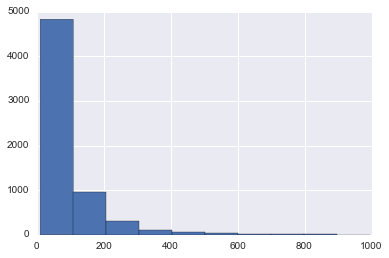

In [80]:
race[race['win_dividend1']<1000]['win_dividend1'].hist()

In [81]:
np.percentile(race['win_dividend1'],90)

195.59999999999991